In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
model = tf.keras.models.load_model("final_trained_model.keras")
print("Model loaded successfully!")


Model loaded successfully!


In [7]:
TEST_DIR = r"C:\Users\KIIT\Downloads\BloodCellDetection\BloodCellDetection\blood cell images dataset\bloodcells_dataset"

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(299, 299),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 17092 images belonging to 8 classes.


In [8]:
pred_probs = model.predict(test_gen)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

print("Prediction completed!")

535/535 ━━━━━━━━━━━━━━━━━━━━ 1830s 3s/step
Prediction completed!


In [9]:
print(classification_report(true_classes, pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

    basophil       0.94      0.99      0.96      1218
  eosinophil       0.99      1.00      0.99      3117
erythroblast       0.98      0.99      0.98      1551
          ig       0.97      0.91      0.94      2895
  lymphocyte       0.97      0.98      0.97      1214
    monocyte       0.95      0.98      0.96      1420
  neutrophil       0.97      0.97      0.97      3329
    platelet       1.00      1.00      1.00      2348

    accuracy                           0.97     17092
   macro avg       0.97      0.98      0.97     17092
weighted avg       0.97      0.97      0.97     17092



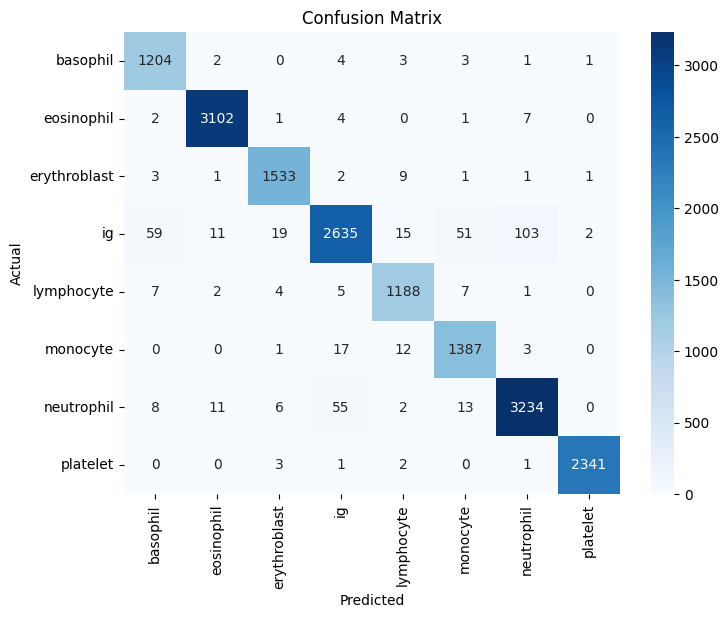

In [10]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


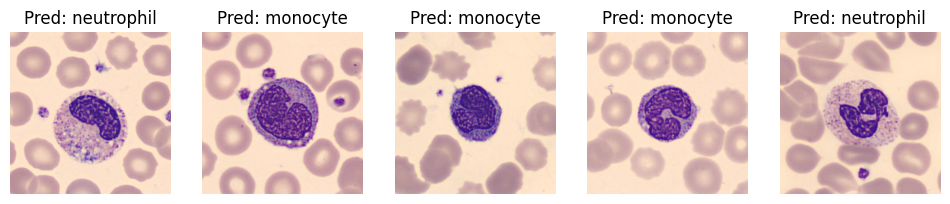

In [11]:
import random
import os
import cv2

test_path = TEST_DIR

plt.figure(figsize=(12, 8))
for i in range(5):
    cls = random.choice(os.listdir(test_path))
    cls_path = os.path.join(test_path, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (299, 299))

    x = np.expand_dims(img_resized, axis=0)
    x = preprocess_input(x)

    pred = model.predict(x)
    pred_label = class_labels[np.argmax(pred)]

    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Pred: {pred_label}")
    plt.axis("off")

plt.show()

535/535 ━━━━━━━━━━━━━━━━━━━━ 2008s 4s/step - accuracy: 0.9726 - loss: 0.0864
Test Accuracy: 0.9726187586784363
Test Loss: 0.08638141304254532


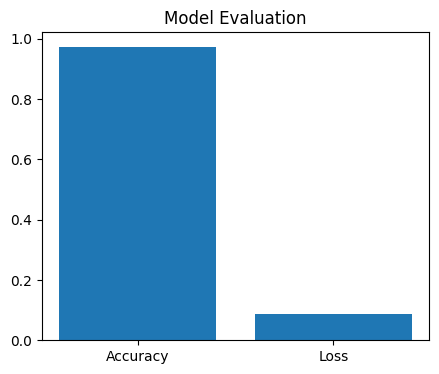

In [12]:
loss, accuracy = model.evaluate(test_gen)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)
plt.figure(figsize=(5,4))
plt.bar(["Accuracy", "Loss"], [accuracy, loss])
plt.title("Model Evaluation")
plt.show()

In [15]:
from tensorflow.keras.models import load_model
model = load_model("checkpoint.keras")

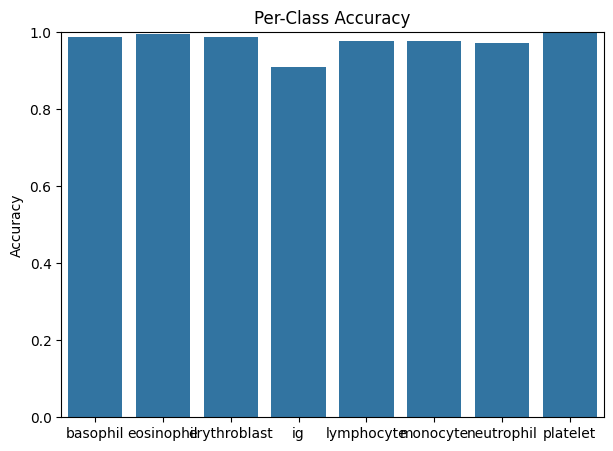

In [16]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(7,5))
sns.barplot(x=class_labels, y=class_accuracy)
plt.ylim(0,1)
plt.title("Per-Class Accuracy")
plt.ylabel("Accuracy")
plt.show()

In [20]:
import numpy as np
n_classes = len(class_labels)   
true_classes = test_gen.classes   
pred_probs = model.predict(test_gen)

535/535 ━━━━━━━━━━━━━━━━━━━━ 1793s 3s/step


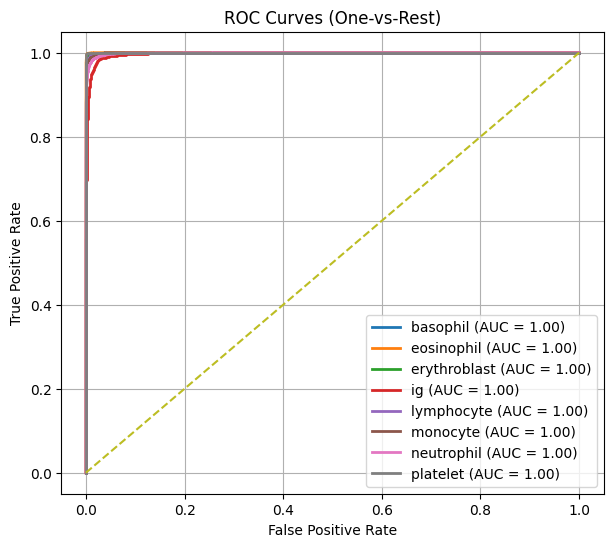

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_classes == i, pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()

535/535 ━━━━━━━━━━━━━━━━━━━━ 9694s 18s/step - accuracy: 0.9726 - loss: 0.0864
Test Accuracy: 0.9726187586784363
Test Loss: 0.08638141304254532


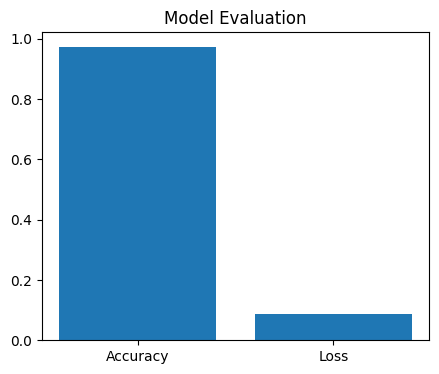

In [22]:
loss, accuracy = model.evaluate(test_gen)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

plt.figure(figsize=(5,4))
plt.bar(["Accuracy", "Loss"], [accuracy, loss])
plt.title("Model Evaluation")
plt.show()